In [1]:
import keras
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Using TensorFlow backend.


In [2]:
import sys
print(sys.version)
print(keras.__version__)
print(tf.__version__)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
2.2.2
1.10.0


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session
#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.3
#config.gpu_options.visible_device_list = "0"
#set_session(tf.Session(config=config))

In [17]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

## MNIST data

In [45]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [47]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [48]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [49]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [50]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [51]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [52]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## CNN

In [72]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [73]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [75]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.2627 - acc: 0.9191 - val_loss: 0.0525 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0865 - acc: 0.9734 - val_loss: 0.0415 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0659 - acc: 0.9806 - val_loss: 0.0357 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0535 - acc: 0.9841 - val_loss: 0.0348 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0467 - acc: 0.9857 - val_loss: 0.0303 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0309 - val_acc: 0.9892
Epoch 7/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03495144805789023
Test accuracy: 0.989


## CNN autoencoder

In [10]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [20]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 8)           0         
__________

Run on the server:

tensorboard --logdir=/tmp/autoencoder

In [22]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.2124 - val_loss: 0.1596
Epoch 2/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.1496 - val_loss: 0.1420
Epoch 3/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1356 - val_loss: 0.1302
Epoch 4/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1280 - val_loss: 0.1285
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1232 - val_loss: 0.1220
Epoch 6/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.1201 - val_loss: 0.1146
Epoch 7/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1178 - val_loss: 0.1140
Epoch 8/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.1156 - val_loss: 0.1123
Epoch 9/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1139 - val_loss: 0.1149
Epo

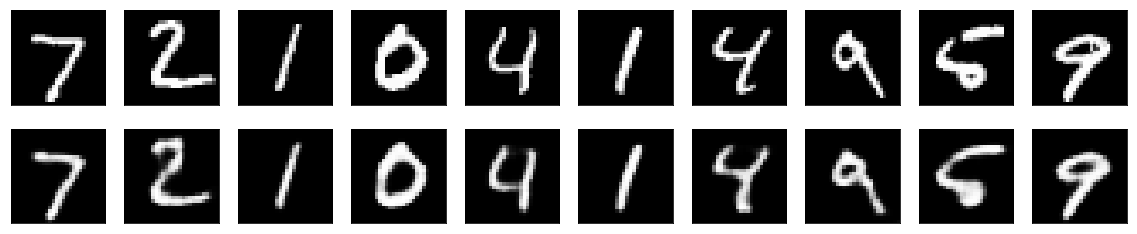

In [23]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
score = autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 104us/step


In [25]:
score

0.09560916576385498

In [26]:
cnn_encoder = Model(input_img, encoded)

In [27]:
x_test.shape

(10000, 28, 28, 1)

In [28]:
encoded_imgs = cnn_encoder.predict(x_test)

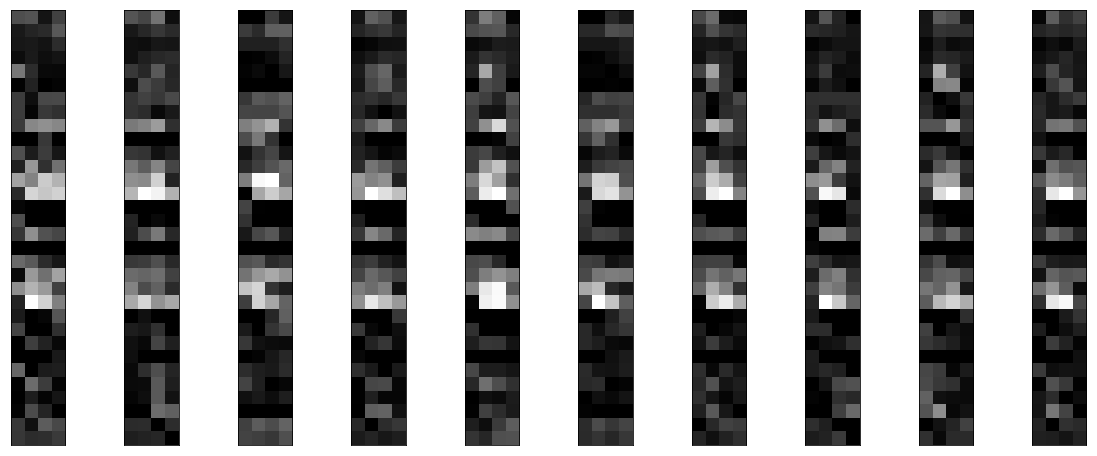

In [29]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Model saving

In [30]:
autoencoder.save("cnn_autoencoder.h5")

In [31]:
from keras.models import load_model

In [32]:
del autoencoder

In [33]:
restored_model = load_model("cnn_autoencoder.h5")

In [34]:
restored_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 8)           0         
__________

## Using trained models

https://keras.io/applications/

In [125]:
vgg19 = keras.applications.vgg19.VGG19(  # 570 Mb
    include_top=True,
    weights='imagenet', 
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

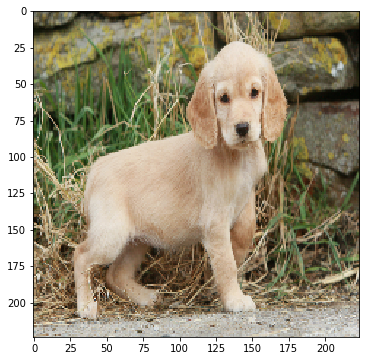

In [126]:
img_path = 'dog.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [127]:
str(img)

'<PIL.Image.Image image mode=RGB size=224x224 at 0x15C4FD385C0>'

In [129]:
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = keras.applications.vgg19.preprocess_input(x)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [130]:
res=vgg19.predict(x)
res.shape

(1, 1000)

In [131]:
res

array([[1.10930323e-05, 2.56522117e-06, 1.26345014e-06, 8.49678997e-07,
        5.63885760e-06, 3.41120131e-06, 3.44479702e-07, 4.43123963e-06,
        4.76909117e-05, 5.05355217e-07, 6.16952548e-07, 8.27683380e-07,
        3.51625044e-06, 1.83759562e-06, 1.51337656e-06, 2.18312312e-06,
        7.05130503e-07, 2.92730965e-06, 6.97463975e-07, 1.54960230e-06,
        7.18754052e-07, 2.18272953e-06, 5.36023072e-06, 1.41509618e-05,
        2.98485202e-06, 6.66249707e-06, 9.03315231e-06, 6.51916798e-06,
        1.93163487e-06, 1.02317313e-06, 1.90026617e-06, 2.25005692e-06,
        4.63641618e-06, 2.71096701e-06, 3.27297994e-06, 9.78268872e-06,
        7.49321862e-06, 9.39794791e-06, 1.31980987e-05, 1.70080912e-05,
        3.14756253e-05, 7.54195935e-05, 3.69661975e-05, 4.26325205e-05,
        9.59702447e-06, 3.17903755e-06, 3.85291969e-05, 7.99869485e-06,
        5.87192553e-05, 4.40627582e-06, 4.42231067e-06, 5.36274092e-06,
        8.77452476e-06, 2.05343372e-06, 3.23875020e-06, 2.745513

In [132]:
np.argmax(res, axis=1)

array([207], dtype=int64)

In [133]:
keras.applications.vgg19.decode_predictions(res)

[[('n02099601', 'golden_retriever', 0.78406334),
  ('n02102318', 'cocker_spaniel', 0.038392402),
  ('n02091831', 'Saluki', 0.03428278),
  ('n02115641', 'dingo', 0.033415154),
  ('n02099712', 'Labrador_retriever', 0.028382068)]]

In [134]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [135]:
xcept = keras.applications.xception.Xception(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

In [136]:
xcept.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [137]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

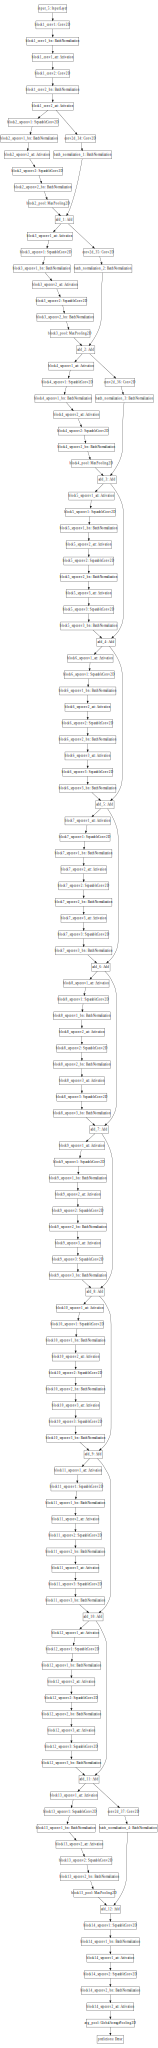

In [138]:
SVG(model_to_dot(xcept).create(prog='dot', format='svg'))

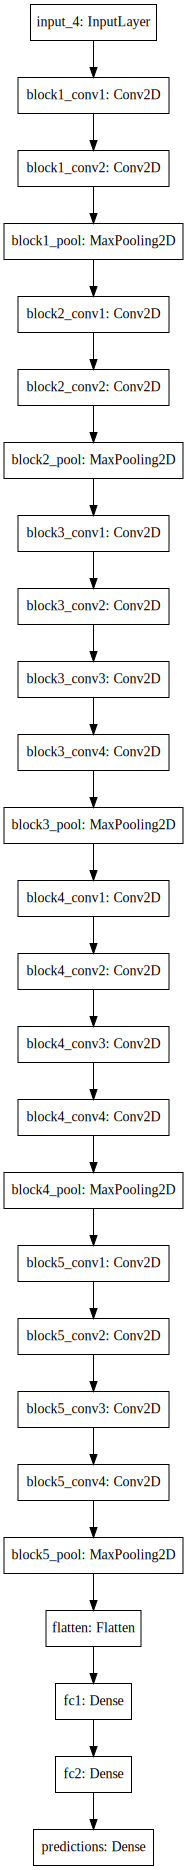

In [139]:
SVG(model_to_dot(vgg19).create(prog='dot', format='svg'))

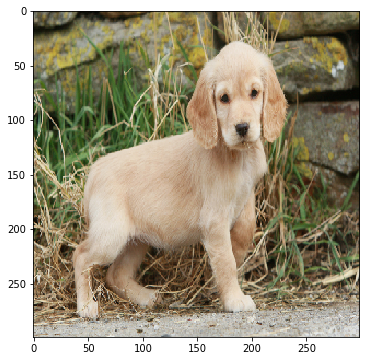

In [140]:
img = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img)
plt.show()

In [141]:
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = keras.applications.xception.preprocess_input(x)
print(x.shape)
res=xcept.predict(x)
print(res.shape)
keras.applications.xception.decode_predictions(res)

(299, 299, 3)
(1, 299, 299, 3)
(1, 299, 299, 3)
(1, 1000)


[[('n02099601', 'golden_retriever', 0.47158474),
  ('n02102318', 'cocker_spaniel', 0.12101045),
  ('n02099712', 'Labrador_retriever', 0.082172215),
  ('n02101556', 'clumber', 0.021299079),
  ('n02102480', 'Sussex_spaniel', 0.018928623)]]

In [142]:
del vgg19, xcept

## CNN visualization

In [7]:
from keras.applications import VGG16

cnn = VGG16(weights='imagenet',
            include_top=True,
            input_shape=(224, 224, 3))

In [8]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
#!pip install git+https://github.com/raghakot/keras-vis.git

In [10]:
from vis.utils import utils

layer_idx = utils.find_layer_idx(cnn, 'predictions')

In [13]:
plt.rcParams['figure.figsize'] = (18, 6)

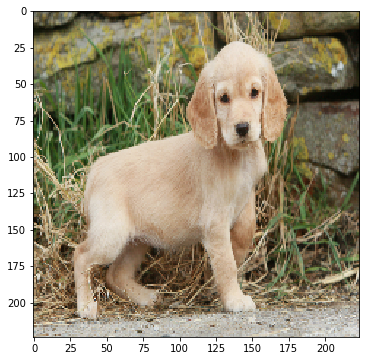

In [14]:
img_path = 'dog.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

## Maximizing activations

https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/activation_maximization.ipynb

### Dense layers

In [15]:
def describe_predictions_on_img(img, model, do_preprocess=True):
    x = image.img_to_array(img)
    print(x.shape)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    print("min: {}, max: {}".format(np.min(x), np.max(x)))
    if do_preprocess:
        x = keras.applications.vgg16.preprocess_input(x)
        print(x.shape)
        print("min: {}, max: {}".format(np.min(x), np.max(x)))
    res=model.predict(x)
    print(res.shape)
    print(np.argmax(res))
    print(keras.applications.vgg16.decode_predictions(res))

In [16]:
describe_predictions_on_img(img, cnn, do_preprocess=True)

(224, 224, 3)
(1, 224, 224, 3)
min: 0.0, max: 250.0
(1, 224, 224, 3)
min: -121.68000030517578, max: 142.06100463867188
(1, 1000)
207
[[('n02099601', 'golden_retriever', 0.8430667), ('n02091831', 'Saluki', 0.054620642), ('n02099712', 'Labrador_retriever', 0.03218183), ('n02102318', 'cocker_spaniel', 0.023187153), ('n02100735', 'English_setter', 0.0065160873)]]


In [17]:
# Swap softmax with linear
cnn.layers[layer_idx].activation = keras.activations.linear
cnn = utils.apply_modifications(cnn)

C:\Users\cheshire\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


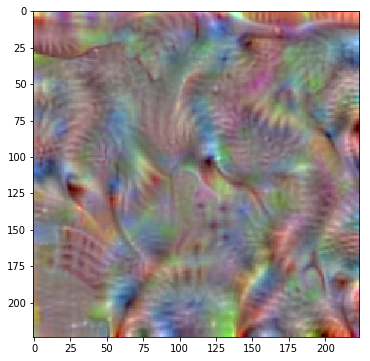

In [18]:
from vis.visualization import visualize_activation

# Let's check category 207
img_maximized = visualize_activation(cnn, layer_idx, filter_indices=207)
plt.imshow(img_maximized)

In [19]:
np.min(img_maximized), np.max(img_maximized)

(0, 255)

In [20]:
# Return softmax
cnn.layers[layer_idx].activation = keras.activations.softmax
cnn = utils.apply_modifications(cnn)

C:\Users\cheshire\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [21]:
describe_predictions_on_img(img_maximized, cnn, do_preprocess=False)

(224, 224, 3)
(1, 224, 224, 3)
min: 0.0, max: 255.0
(1, 1000)
207
[[('n02099601', 'golden_retriever', 1.0), ('n02108551', 'Tibetan_mastiff', 4.8087033e-14), ('n02099712', 'Labrador_retriever', 4.7508313e-14), ('n02102480', 'Sussex_spaniel', 3.243149e-14), ('n02101556', 'clumber', 1.952208e-14)]]


In [ ]:
#img_maximized = visualize_activation(cnn, layer_idx, filter_indices=207, max_iter=500, verbose=True)
#plt.imshow(img_maximized)

In [22]:
from vis.input_modifiers import Jitter

C:\Users\cheshire\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


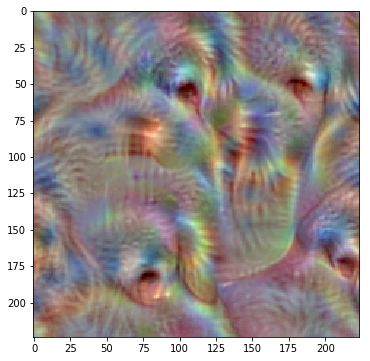

In [24]:
# Swap softmax with linear
cnn.layers[layer_idx].activation = keras.activations.linear
cnn = utils.apply_modifications(cnn)

img_maximized2 = visualize_activation(cnn, layer_idx, filter_indices=207, input_modifiers=[Jitter(16)])
plt.imshow(img_maximized2)

# Return softmax
cnn.layers[layer_idx].activation = keras.activations.softmax
cnn = utils.apply_modifications(cnn)

In [25]:
describe_predictions_on_img(img_maximized2, cnn, do_preprocess=False)

(224, 224, 3)
(1, 224, 224, 3)
min: 0.0, max: 255.0
(1, 1000)
207
[[('n02099601', 'golden_retriever', 0.99999475), ('n02102480', 'Sussex_spaniel', 4.7199906e-06), ('n02101556', 'clumber', 4.9313e-07), ('n02102318', 'cocker_spaniel', 1.3945067e-08), ('n02108551', 'Tibetan_mastiff', 6.671775e-09)]]


### Conv filters

In [30]:
from vis.visualization import get_num_filters

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


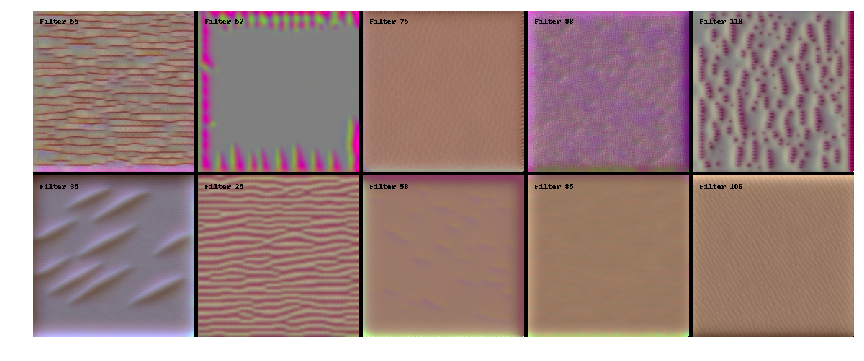

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


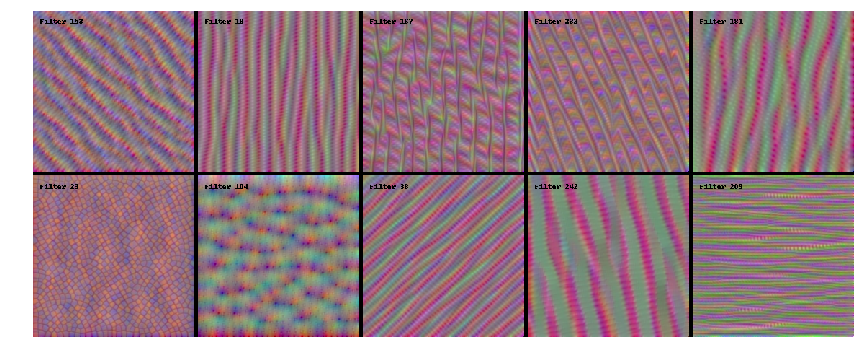

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


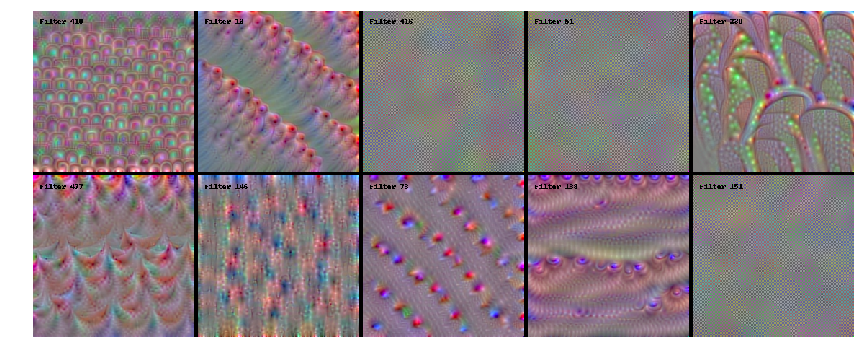

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


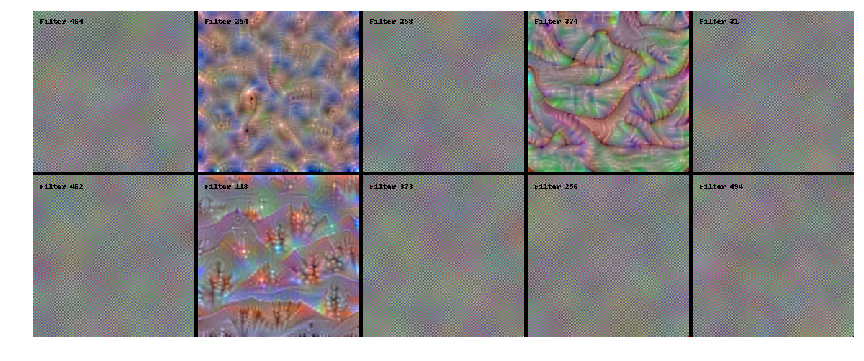

In [32]:
selected_indices = []
for layer_name in ['block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']:
    layer_idx = utils.find_layer_idx(cnn, layer_name)

    # Visualize all filters in this layer.
    filters = np.random.permutation(get_num_filters(cnn.layers[layer_idx]))[:10]
    selected_indices.append(filters)

    # Generate input image for each filter.
    vis_images = []
    for idx in filters:
        img = visualize_activation(cnn, layer_idx, filter_indices=idx)

        # Utility to overlay text on image.
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # Generate stitched image palette with 5 cols so we get 2 rows.
    stitched = utils.stitch_images(vis_images, cols=5)    
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()

## Saliency maps

**Notebook**:

https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/attention.ipynb

**Blogs**

Visualizing A Convolutional Neural Network's Predictions
https://rajpurkar.github.io/mlx/visualizing-cnns/

WHERE CNN IS LOOKING? – GRAD CAM
http://www.hackevolve.com/where-cnn-is-looking-grad-cam/

**Papers**

Deep Inside Convolutional Networks: Visualising
Image Classification Models and Saliency Maps

https://arxiv.org/pdf/1312.6034.pdf


Learning Deep Features for Discriminative Localization

https://arxiv.org/pdf/1512.04150.pdf


Grad-CAM:
Visual Explanations from Deep Networks via Gradient-based Localization

https://arxiv.org/pdf/1610.02391.pdf

http://gradcam.cloudcv.org/

In [10]:
from vis.utils import utils
from keras import activations
from keras.applications import VGG16

cnn = VGG16(weights='imagenet',
            include_top=True,
            input_shape=(224, 224, 3))

layer_idx = utils.find_layer_idx(cnn, 'predictions')

# Swap softmax with linear
cnn.layers[layer_idx].activation = activations.linear
cnn = utils.apply_modifications(cnn)

C:\Users\cheshire\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


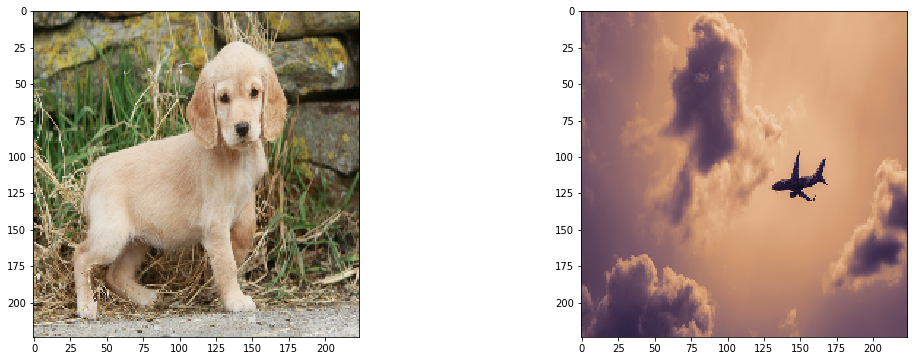

In [13]:
from keras.preprocessing import image

img1 = image.load_img('dog.jpg', target_size=(224, 224))
img2 = image.load_img('plane.jpg', target_size=(224, 224))

plt.rcParams['figure.figsize'] = (18, 6)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [30]:
keras.applications.imagenet_utils.imagenet_utils.CLASS_INDEX

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [36]:
def imagenet_get_category_id(catname):
    import keras.applications.imagenet_utils
    catdict = keras.applications.imagenet_utils.imagenet_utils.CLASS_INDEX
    cat = [(k,v[1]) for k,v in catdict.items() if v[1] == catname]
    return cat[0]

In [18]:
describe_predictions_on_img(img1, cnn, do_preprocess=True)

(224, 224, 3)
(1, 224, 224, 3)
min: 0.0, max: 250.0
(1, 224, 224, 3)
min: -121.68000030517578, max: 142.06100463867188
(1, 1000)
207
[[('n02099601', 'golden_retriever', 13.999214), ('n02091831', 'Saluki', 11.26258), ('n02099712', 'Labrador_retriever', 10.73357), ('n02102318', 'cocker_spaniel', 10.4057665), ('n02100735', 'English_setter', 9.136442)]]


In [19]:
describe_predictions_on_img(img2, cnn, do_preprocess=True)

(224, 224, 3)
(1, 224, 224, 3)
min: 0.0, max: 255.0
(1, 224, 224, 3)
min: -120.68000030517578, max: 131.32000732421875
(1, 1000)
812
[[('n04266014', 'space_shuttle', 14.213097), ('n04552348', 'warplane', 13.199493), ('n04592741', 'wing', 12.771835), ('n02690373', 'airliner', 11.159364), ('n09472597', 'volcano', 10.2093315)]]


In [37]:
imagenet_get_category_id('golden_retriever')

('207', 'golden_retriever')

In [40]:
imagenet_get_category_id('space_shuttle')

('812', 'space_shuttle')

In [41]:
imagenet_get_category_id('airliner')

('404', 'airliner')

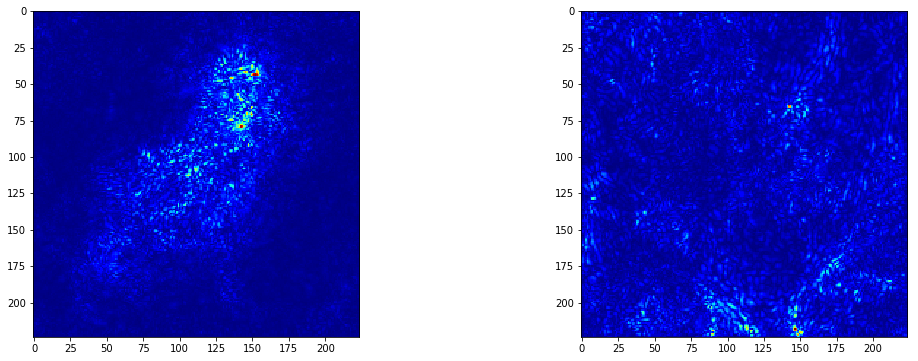

In [39]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(cnn, 'predictions')

f, ax = plt.subplots(1, 2)
for i, imgx in enumerate([(img1,207), (img2,404)]):    
    img, filteridx = imgx[0],imgx[1]
    grads = visualize_saliency(cnn, layer_idx, filter_indices=filteridx, seed_input=image.img_to_array(img))
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

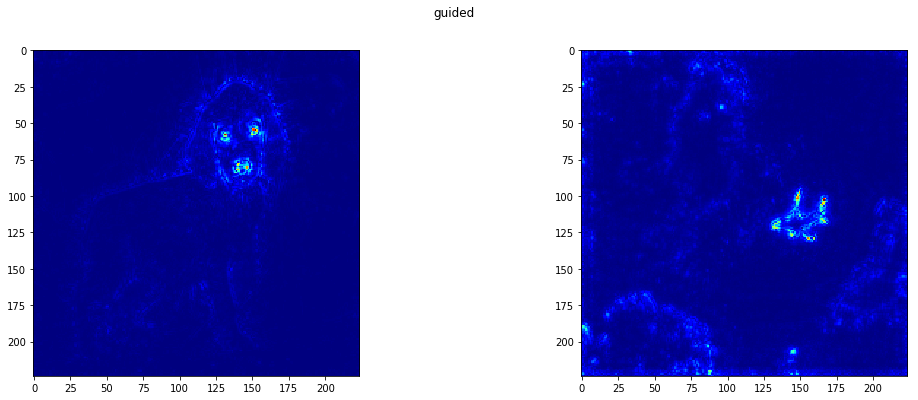

<Figure size 1296x432 with 0 Axes>

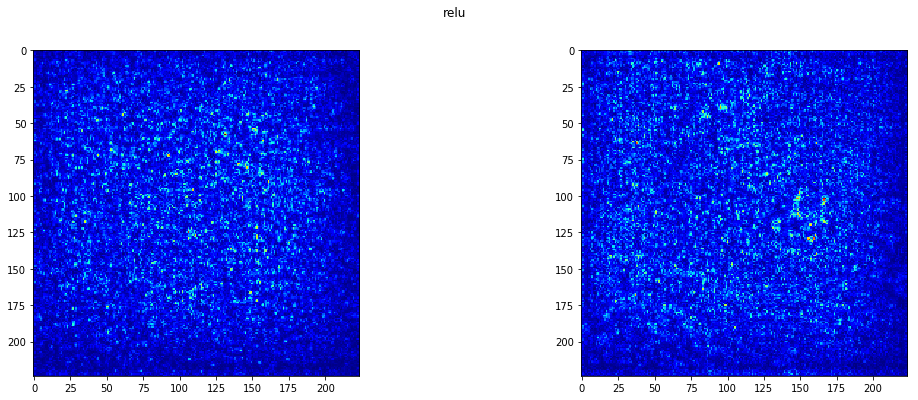

In [42]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, imgx in enumerate([(img1,207), (img2,404)]):   
        img, filteridx = imgx[0],imgx[1]
        grads = visualize_saliency(cnn, layer_idx, filter_indices=filteridx, 
                                   seed_input=image.img_to_array(img), backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

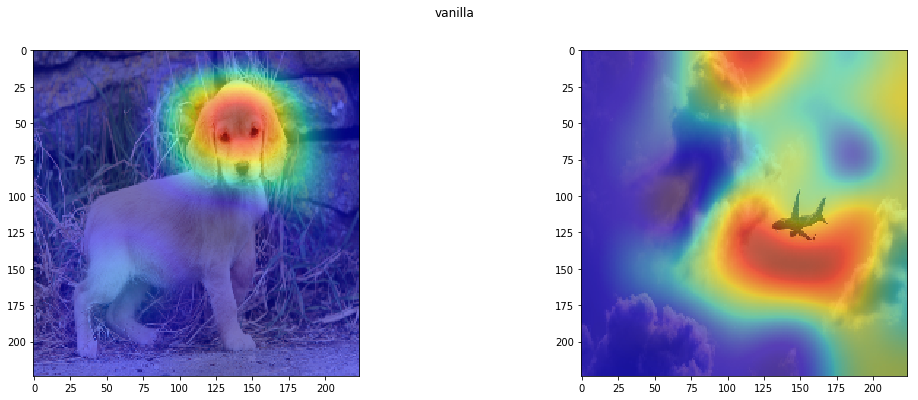

<Figure size 1296x432 with 0 Axes>

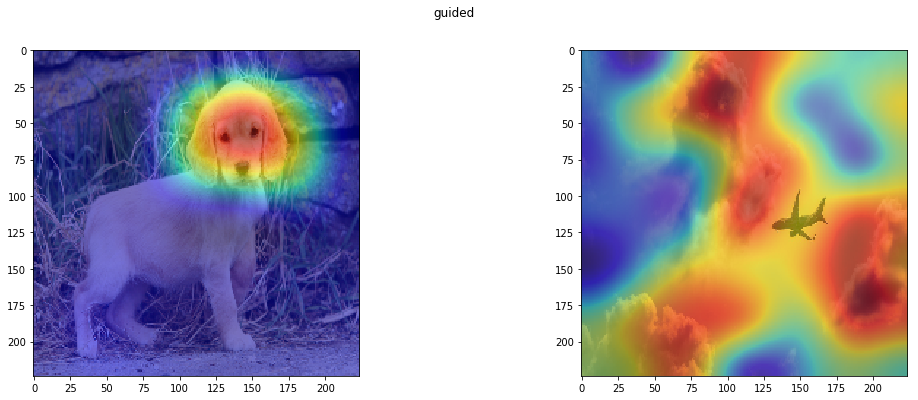

<Figure size 1296x432 with 0 Axes>

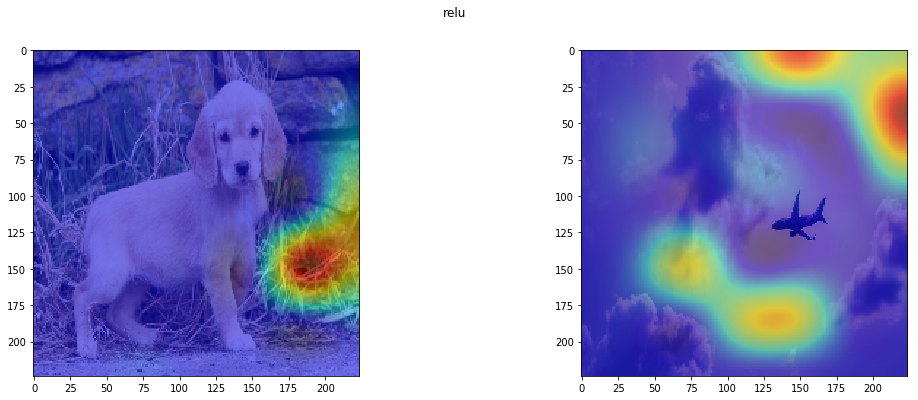

In [43]:
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, imgx in enumerate([(img1,207), (img2,404)]):   
        img, filteridx = imgx[0],imgx[1]
        grads = visualize_cam(cnn, layer_idx, filter_indices=filteridx, 
                              seed_input=image.img_to_array(img), backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, image.img_to_array(img)))

## CNN another way

In [109]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Softmax

input_shape=(None, None, 1)

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(num_classes, (3, 3), activation='relu'))
model.add(GlobalMaxPooling2D())
model.add(Softmax())

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, None, None, 128)   1280      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, None, None, 128)   147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, None, None, 128)   0         
_________________________________________________________________
dropout_11 (Dropout)         (None, None, None, 128)   0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, None, None, 128)   147584    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, None, None, 10)    11530     
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 10)                0         
__________

In [111]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [112]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 298us/step - loss: 0.7337 - acc: 0.7549 - val_loss: 0.2935 - val_acc: 0.8980
Epoch 2/12
60000/60000 [==============================] - 17s 277us/step - loss: 0.2487 - acc: 0.9185 - val_loss: 0.2196 - val_acc: 0.9237
Epoch 3/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.1780 - acc: 0.9424 - val_loss: 0.1308 - val_acc: 0.9586
Epoch 4/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.1309 - acc: 0.9590 - val_loss: 0.1459 - val_acc: 0.9555
Epoch 5/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.1044 - acc: 0.9671 - val_loss: 0.0977 - val_acc: 0.9695
Epoch 6/12
60000/60000 [==============================] - 17s 277us/step - loss: 0.0916 - acc: 0.9712 - val_loss: 0.0938 - val_acc: 0.9714
Epoch 7/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0794 - acc: 0.9753 - val_loss: 0.

In [113]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07060004209664185
Test accuracy: 0.9795


In [114]:
test_image = x_test[42]
test_image.shape

(28, 28, 1)

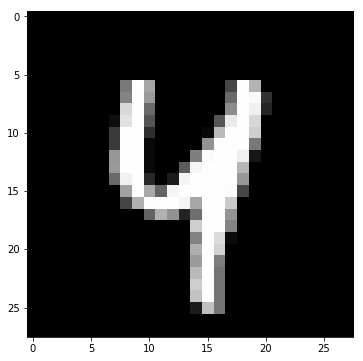

In [115]:
plt.imshow(image.array_to_img(test_image))

In [116]:
test_image_batch = np.expand_dims(test_image, 0)
test_image_batch.shape

(1, 28, 28, 1)

In [117]:
model.predict_classes(test_image_batch)

array([4], dtype=int64)

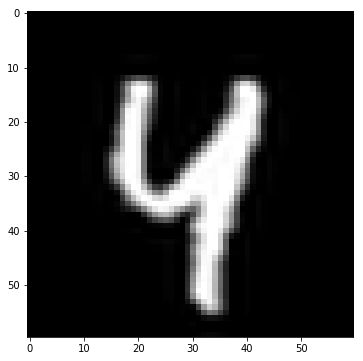

In [118]:
from PIL import Image

test_image_resize = image.array_to_img(test_image).resize((60,60), Image.ANTIALIAS)
plt.imshow(test_image_resize)

In [119]:
test_image_batch = np.expand_dims(image.img_to_array(test_image_resize), 0)
test_image_batch.shape

(1, 60, 60, 1)

In [120]:
model.predict_classes(test_image_batch)

array([7], dtype=int64)

In [121]:
model.predict_proba(test_image_batch)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

array([4], dtype=int64)

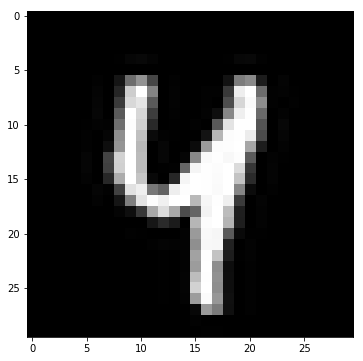

In [122]:
test_image_resize = image.array_to_img(test_image).resize((30,30), Image.ANTIALIAS)
plt.imshow(test_image_resize)
test_image_batch = np.expand_dims(image.img_to_array(test_image_resize), 0)
model.predict_classes(test_image_batch)

array([4], dtype=int64)

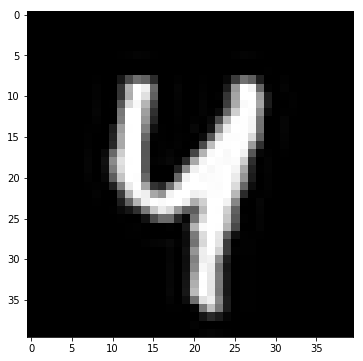

In [123]:
test_image_resize = image.array_to_img(test_image).resize((40,40), Image.ANTIALIAS)
plt.imshow(test_image_resize)
test_image_batch = np.expand_dims(image.img_to_array(test_image_resize), 0)
model.predict_classes(test_image_batch)